In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

In [2]:
IMAGE_SIZE = 224
N_CLASSES = 5

In [3]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        
    shear_range=0.2,         
    zoom_range=0.2,        
    horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
BATCH_SIZE = 24

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2398 images belonging to 5 classes.


In [7]:
class_names = sorted(os.listdir(train_dir))

print(class_names)

['Damask Rose', 'Echeveria Flower', 'Mirabilis Jalapa', 'Rain Lily', 'Zinnia Elegans']


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 469 images belonging to 5 classes.


In [9]:
model = models.Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(N_CLASSES, activation='softmax')
])

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [12]:
EPOCHS = 12

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.n // BATCH_SIZE
)

Epoch 1/12
99/99 [==============================] - 168s 2s/step - loss: 1.1568 - accuracy: 0.4958 - val_loss: 0.8145 - val_accuracy: 0.7368
Epoch 2/12
99/99 [==============================] - 110s 1s/step - loss: 0.5054 - accuracy: 0.8176 - val_loss: 0.4758 - val_accuracy: 0.9079
Epoch 3/12
99/99 [==============================] - 118s 1s/step - loss: 0.2371 - accuracy: 0.9246 - val_loss: 0.4654 - val_accuracy: 0.9342
Epoch 4/12
99/99 [==============================] - 116s 1s/step - loss: 0.1450 - accuracy: 0.9478 - val_loss: 0.4565 - val_accuracy: 0.9430
Epoch 5/12
99/99 [==============================] - 115s 1s/step - loss: 0.1311 - accuracy: 0.9562 - val_loss: 0.6367 - val_accuracy: 0.9386
Epoch 6/12
99/99 [==============================] - 115s 1s/step - loss: 0.0695 - accuracy: 0.9789 - val_loss: 0.6252 - val_accuracy: 0.9474
Epoch 7/12
99/99 [==============================] - 117s 1s/step - loss: 0.0894 - accuracy: 0.9756 - val_loss: 0.7882 - val_accuracy: 0.9079
Epoch 8/12
99

In [13]:
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)

100/100 [==============================] - 55s 551ms/step - loss: 0.0314 - accuracy: 0.9896
Train Loss: 0.0313723161816597
Train Accuracy: 0.989574670791626


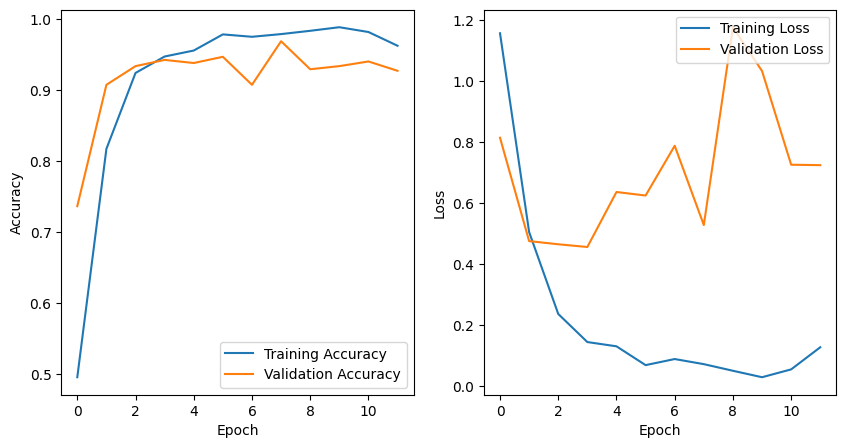

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
print(train_generator[1])

(array([[[[2.24049792e-01, 2.16206655e-01, 1.57383129e-01],
         [2.13798642e-01, 2.05955505e-01, 1.47131965e-01],
         [1.95730940e-01, 1.87887803e-01, 1.29064277e-01],
         ...,
         [8.89584839e-01, 9.03174102e-01, 9.56523836e-01],
         [8.80563259e-01, 8.92348349e-01, 9.51110899e-01],
         [8.82507682e-01, 8.94272387e-01, 9.53095913e-01]],

        [[2.77690947e-01, 2.69847810e-01, 2.11024299e-01],
         [2.54740387e-01, 2.46897250e-01, 1.88073710e-01],
         [2.14238912e-01, 2.06395775e-01, 1.47572249e-01],
         ...,
         [9.02239978e-01, 9.17833507e-01, 9.63972270e-01],
         [8.81165981e-01, 8.94202530e-01, 9.49196339e-01],
         [8.74877572e-01, 8.87883544e-01, 9.42983210e-01]],

        [[2.99199194e-01, 2.91356057e-01, 2.32532546e-01],
         [2.98757464e-01, 2.90914327e-01, 2.32090816e-01],
         [2.74209976e-01, 2.66366839e-01, 2.07543314e-01],
         ...,
         [9.09406841e-01, 9.25093114e-01, 9.67201054e-01],
         

In [16]:
import os

1/1 [==============================] - 0s 59ms/step


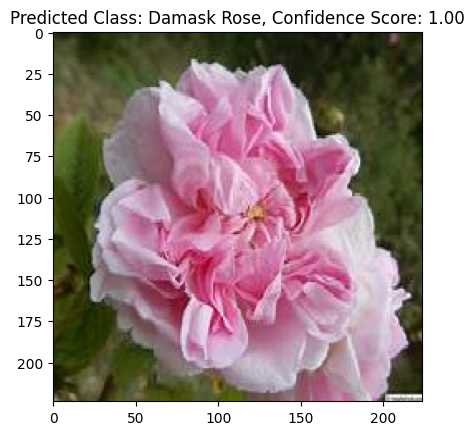

In [22]:
test_image_path = 'test_image4.jpg'
image = load_img(test_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0

# Make predictions on the test image
prediction = model.predict(image_array)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Display the image and prediction information
plt.imshow(image)
plt.title(f"Predicted Class: {class_name}, Confidence Score: {confidence_score:.2f}")
plt.axis("on")
plt.show()

In [23]:
model.save("trained_model.h5")